Elliot Ide Pozo

In [1]:
from sshtunnel import SSHTunnelForwarder
import pymysql
import pandas as pd

In [3]:
# https://stackoverflow.com/questions/21903411/enable-python-to-connect-to-mysql-via-ssh-tunnelling
# https://stackoverflow.com/questions/42726681/conecting-to-mysql-in-a-remote-server-from-python

with SSHTunnelForwarder(
            'activismo.inf.uach.cl',
            ssh_username='vps238',
            ssh_password='vps238.2018',
            remote_bind_address=('127.0.0.1', 3306)) as tunnel:
        conn = pymysql.connect(host='127.0.0.1', user='learning',
                               passwd='analytic$',db='gonsa2',
                               port=tunnel.local_bind_port)
        query1 = "SELECT date_executed, FK_challenge_id_number, FK_student_nick,id_number,query,snippet \
        FROM Students_query\
        INNER JOIN Students_queries_results ON FK_student_query_id_number = id_number\
        WHERE FK_challenge_id_number = 4 AND FK_student_nick != 'test_student'\
        AND date_executed BETWEEN '2019-04-29 00:00:00' AND '2019-04-29 23:59:59'"

        query2 = "SELECT DISTINCT FK_student_nick FROM Students_query\
        WHERE FK_challenge_id_number = 4 \
        AND date_executed BETWEEN '2019-04-29 00:00:00' AND '2019-04-29 23:59:59'\
        AND FK_student_nick != 'test_student'"
        data = pd.read_sql(query1, conn)
        data2 = pd.read_sql(query2, conn)
        conn.close()

In [4]:
from bs4 import BeautifulSoup

In [5]:
#https://www.crummy.com/software/BeautifulSoup/bs4/doc/
#https://stackoverflow.com/questions/19798153/difference-between-map-applymap-and-apply-methods-in-pandas
    
# transformar en un objeto BeautifulSoup, para luego retornar el texto sin tags
data['snippet'] = data['snippet'].map(lambda text: BeautifulSoup(text, 'html.parser').get_text())

In [6]:
aux = data.groupby('id_number').head(3).groupby('FK_student_nick').head(3)
aux # 3 primeros resultados para cada usuario de su primera query emitida

,date_executed,FK_challenge_id_number,FK_student_nick,id_number,query,snippet
0,2019-04-29 14:42:34,4,aarriagada,82,como construir un automovil,Cómo construir un auto deportivo con poco dine...
1,2019-04-29 14:42:34,4,aarriagada,82,como construir un automovil,"Construir un motor de automóvil desde cero, ll..."
2,2019-04-29 14:42:34,4,aarriagada,82,como construir un automovil,Relájate y disfruta en HD del proceso de ensam...
145,2019-04-29 14:50:22,4,cduarte,151,soapbox,Soapbox is a Chrome extension that enables any...
146,2019-04-29 14:50:22,4,cduarte,151,soapbox,SoapBox is an app designed to help managers ha...
...,...,...,...,...,...,...
8069,2019-04-29 15:06:03,4,falvarado,409,arquitectura de un automovil,Así la Municipalidad de Miraflores pondría a r...
8070,2019-04-29 15:06:03,4,falvarado,409,arquitectura de un automovil,Sin duda el automóvil es una pieza clave en la...
15683,2019-04-29 15:16:50,4,aduque,603,autos soapbox,Encuentra el Seguro Obligatorio Automotriz SOA...
15684,2019-04-29 15:16:50,4,aduque,603,autos soapbox,Need for Speed World Online en 3DJuegos: Bueno...


In [7]:
df = aux.drop_duplicates(['FK_student_nick','query'])[['FK_student_nick', 'query']] # primera query unica
df = df.reset_index(drop=True)

In [8]:
df['snippet1'] = aux['snippet'].iloc[::3].reset_index(drop=True) # 3 documentos por usuario
df['snippet2'] = aux['snippet'].iloc[1::3].reset_index(drop=True)
df['snippet3'] = aux['snippet'].iloc[2::3].reset_index(drop=True)

In [9]:
df

,FK_student_nick,query,snippet1,snippet2,snippet3
0,aarriagada,como construir un automovil,Cómo construir un auto deportivo con poco dine...,"Construir un motor de automóvil desde cero, ll...",Relájate y disfruta en HD del proceso de ensam...
1,cduarte,soapbox,Soapbox is a Chrome extension that enables any...,SoapBox is an app designed to help managers ha...,A soapbox is a raised platform on which one st...
2,abastian,Crear un auto básico,This feature is not available right now. Pleas...,PARA HACER CAPAS MIRA EL Anexo a Curso de Auto...,Crear un diagrama de flujo. En el menú Archivo...
3,ocontreras,Como construir un automovi,"Construir un motor de automóvil desde cero, ll...",Cómo construir un auto deportivo con poco dine...,"Fases. Antes de producir un vehículo, ha de co..."
4,gcurguan,Como construir un auto de carreras,QUIERES FORMAR PARTE DE LA MEJOR NETWORK DE YO...,Un auto de carrera puede ser un juego o un obj...,UN COCHE DE CARRERAS DEFINICIÓN DEL PROYECTO. ...
5,mcarep,construir automovil derby soapbox,Fácil Soap Box Derby coche construir Estas ins...,Sobre soap box derby de coches Soap box derby ...,3rd Annual Nevada City Soap Box Derby. 3rd Ann...
6,eespinoza,como construir un automovil de carrerqas,Construye un automóvil de carreras casero y se...,Un auto de carrera puede ser un juego o un obj...,Estudiantes de la Universidad Politécnica Sale...
7,gandrade,que debe tener mi auto para competir en nascar?,Están preparados para competir más de 500 mill...,Hay una frase muy importante en estados Unidos...,NASCAR hace referencia a las siglas en inglés ...
8,jfernandez,asd,Anchorage School District website accessibilit...,Tip: Incorrect ASD file association errors can...,Definición de ASD en el Diccionario de español...
9,bcortes,componentes de un automovil,El primer viaje largo en un automóvil lo reali...,COMPONENTES DE UN AUTOMOVIL 1. PistónFoto de u...,Curso Mecánica: Experto en Autopartes | Compon...


In [10]:
# Comprobación de estudiantes unicos
data.drop_duplicates(['FK_student_nick'])['FK_student_nick'].shape

(30,)

In [11]:
data2.shape

(30, 1)

### Estimación TF-IDF  y Similaridad del coseno

Fuentes: 

https://www.youtube.com/watch?v=hc3DCn8viWs

https://intellipaat.com/community/1103/python-tf-idf-cosine-to-find-document-similarity

    
**Desventajas de TF-IDF**
- Only based on terms
- Weak on capturing document topic
- Weak handling synonyms

**Como mejorar**
- LSA (Latent Semantic Analysis)
- Word Embedding (Word2Vec, Glove)
- ConceptNet

In [12]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np

In [13]:
es_sw = stopwords.words('spanish') # lista stopword a usar

In [14]:
tf = TfidfVectorizer(stop_words=es_sw) # crear la transformación

In [15]:
df.shape

(30, 5)

In [16]:
def sim_matrix(q, s1, s2, s3):
    # vectorizacion
    tfidf_matrix = tf.fit_transform([q,s1,s2,s3]) # corpus, tdif_matrix[0] corresponde a la matriz de la query
    #print (tfidf_matrix)
    S = []
    for i in range(4): # largo del corpus
        S.append(linear_kernel(tfidf_matrix[i], tfidf_matrix).flatten()) # similaridad del coseno 
    return S

In [17]:
# matriz de similaridad del coseno
S = [sim_matrix(row[0], row[1], row[2], row[3]) for row in df[['query', 'snippet1', 'snippet2', 'snippet3']].values]

In [18]:
S = np.asarray(S) # casteo como np

In [19]:
S[0] # 29 submatrices de similaridad por usuario, query y 3 snippets respectivas

array([[1.        , 0.10385423, 0.06227762, 0.        ],
       [0.10385423, 1.        , 0.02234317, 0.0679033 ],
       [0.06227762, 0.02234317, 1.        , 0.        ],
       [0.        , 0.0679033 , 0.        , 1.        ]])

In [20]:
df['sum_cos'] = "" # arreglo

In [21]:
# estimación del puntaje del coseno
for i in range(S.shape[0]):
    df['sum_cos'][i] = S[i][1,2] + S[i][1,3] + S[i][2,3]

In [22]:
df

,FK_student_nick,query,snippet1,snippet2,snippet3,sum_cos
0,aarriagada,como construir un automovil,Cómo construir un auto deportivo con poco dine...,"Construir un motor de automóvil desde cero, ll...",Relájate y disfruta en HD del proceso de ensam...,0.0902465
1,cduarte,soapbox,Soapbox is a Chrome extension that enables any...,SoapBox is an app designed to help managers ha...,A soapbox is a raised platform on which one st...,0.300216
2,abastian,Crear un auto básico,This feature is not available right now. Pleas...,PARA HACER CAPAS MIRA EL Anexo a Curso de Auto...,Crear un diagrama de flujo. En el menú Archivo...,0.0111888
3,ocontreras,Como construir un automovi,"Construir un motor de automóvil desde cero, ll...",Cómo construir un auto deportivo con poco dine...,"Fases. Antes de producir un vehículo, ha de co...",0.0790593
4,gcurguan,Como construir un auto de carreras,QUIERES FORMAR PARTE DE LA MEJOR NETWORK DE YO...,Un auto de carrera puede ser un juego o un obj...,UN COCHE DE CARRERAS DEFINICIÓN DEL PROYECTO. ...,0.144053
5,mcarep,construir automovil derby soapbox,Fácil Soap Box Derby coche construir Estas ins...,Sobre soap box derby de coches Soap box derby ...,3rd Annual Nevada City Soap Box Derby. 3rd Ann...,0.423954
6,eespinoza,como construir un automovil de carrerqas,Construye un automóvil de carreras casero y se...,Un auto de carrera puede ser un juego o un obj...,Estudiantes de la Universidad Politécnica Sale...,0.13663
7,gandrade,que debe tener mi auto para competir en nascar?,Están preparados para competir más de 500 mill...,Hay una frase muy importante en estados Unidos...,NASCAR hace referencia a las siglas en inglés ...,0.195299
8,jfernandez,asd,Anchorage School District website accessibilit...,Tip: Incorrect ASD file association errors can...,Definición de ASD en el Diccionario de español...,0.0887821
9,bcortes,componentes de un automovil,El primer viaje largo en un automóvil lo reali...,COMPONENTES DE UN AUTOMOVIL 1. PistónFoto de u...,Curso Mecánica: Experto en Autopartes | Compon...,0.0584604


### Estimacion MMR

Fuentes:

http://www.cs.bilkent.edu.tr/~canf/CS533/hwSpring14/eightMinPresentations/handoutMMR.pdf
https://www.quora.com/What-is-maximal-marginal-relevance-MMR

MMR is a measure for quantifying the extend of dissimilarity between the item being considered and those already selected.
Higher MMR means the considered item is both relevant to the query and contains minimal similarity to previous selected items.

In [23]:
from collections import OrderedDict, Counter

In [24]:
#https://pymotw.com/2/collections/ordereddict.html
#https://www.quora.com/Where-can-I-find-a-maximum-marginal-relevance-algorithm-in-Python-for-redundancy-removal-in-two-documents

def MMR_score(S, docs=[1,2,3], lambda_=0.2):
    selected = OrderedDict()
    init_idx= np.argmax(S[0][1::]) + 1 # el indice del d con mayor similaridad a q
    selected[init_idx] = S[init_idx,0]
    while Counter(selected.keys()) != Counter(docs): # comparar la lista de docs con los seleccionados
        remaining = [x for x in docs if x not in selected]
        mmr_score = lambda x: lambda_*S[x, 0] - (1-lambda_)*max([S[x, y] for y in selected])
        result = {k: mmr_score(k) for k in remaining}
        next_selected = max(result, key=result.get) 
        selected[next_selected] = result[next_selected]
    return selected


In [25]:
df['MMR_score'] = ""

In [26]:
for i in range(S.shape[0]):
    selected = MMR_score(S[i])
    df['MMR_score'][i] = list(selected.values())[1] + list(selected.values())[2]    

In [27]:
df

,FK_student_nick,query,snippet1,snippet2,snippet3,sum_cos,MMR_score
0,aarriagada,como construir un automovil,Cómo construir un auto deportivo con poco dine...,"Construir un motor de automóvil desde cero, ll...",Relájate y disfruta en HD del proceso de ensam...,0.0902465,-0.0597417
1,cduarte,soapbox,Soapbox is a Chrome extension that enables any...,SoapBox is an app designed to help managers ha...,A soapbox is a raised platform on which one st...,0.300216,-0.109983
2,abastian,Crear un auto básico,This feature is not available right now. Pleas...,PARA HACER CAPAS MIRA EL Anexo a Curso de Auto...,Crear un diagrama de flujo. En el menú Archivo...,0.0111888,0.00438188
3,ocontreras,Como construir un automovi,"Construir un motor de automóvil desde cero, ll...",Cómo construir un auto deportivo con poco dine...,"Fases. Antes de producir un vehículo, ha de co...",0.0790593,-0.0375383
4,gcurguan,Como construir un auto de carreras,QUIERES FORMAR PARTE DE LA MEJOR NETWORK DE YO...,Un auto de carrera puede ser un juego o un obj...,UN COCHE DE CARRERAS DEFINICIÓN DEL PROYECTO. ...,0.144053,-0.0990458
5,mcarep,construir automovil derby soapbox,Fácil Soap Box Derby coche construir Estas ins...,Sobre soap box derby de coches Soap box derby ...,3rd Annual Nevada City Soap Box Derby. 3rd Ann...,0.423954,-0.164975
6,eespinoza,como construir un automovil de carrerqas,Construye un automóvil de carreras casero y se...,Un auto de carrera puede ser un juego o un obj...,Estudiantes de la Universidad Politécnica Sale...,0.13663,-0.109304
7,gandrade,que debe tener mi auto para competir en nascar?,Están preparados para competir más de 500 mill...,Hay una frase muy importante en estados Unidos...,NASCAR hace referencia a las siglas en inglés ...,0.195299,-0.110932
8,jfernandez,asd,Anchorage School District website accessibilit...,Tip: Incorrect ASD file association errors can...,Definición de ASD en el Diccionario de español...,0.0887821,-0.036421
9,bcortes,componentes de un automovil,El primer viaje largo en un automóvil lo reali...,COMPONENTES DE UN AUTOMOVIL 1. PistónFoto de u...,Curso Mecánica: Experto en Autopartes | Compon...,0.0584604,-0.0253227


In [28]:
import matplotlib.pyplot as plt

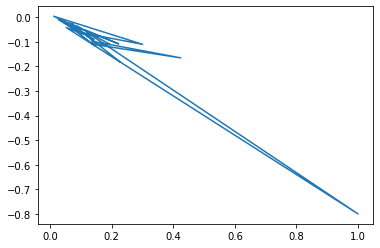

In [29]:
plt.plot(df['sum_cos'], df['MMR_score'])